## Data Pre-Processing

In [2]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importing dataset
dataset = pd.read_csv('datasets/support-vector-regression-data.csv')

# Separate dataset (X) and dependent vector (y)
X = dataset.drop(columns=['Position', 'Salary'])
y = dataset.filter(items=['Salary'])

# Small amount of data, so we want to include all the data

# Feature Scaling, because SVR doesn't do it for us
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)
sc_y = StandardScaler()
y = pd.DataFrame(sc_y.fit_transform(y), columns=y.columns)

## SVR

[170370.0204065]


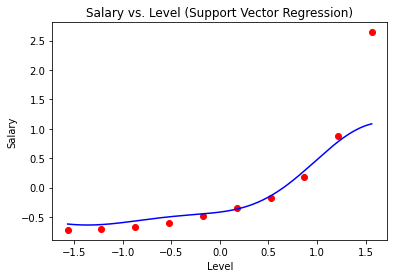

In [3]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X, y)

# Predicting a new result
y_pred = sc_y.inverse_transform(svr.predict(sc_X.transform([[6.5]])))
print(y_pred)

# Visualize result of svr regression
X_interp = np.arange(X['Level'].min(), X['Level'].max(), 0.01)
X_interp = X_interp.reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_interp, svr.predict(X_interp), color='blue')
plt.title('Salary vs. Level (Support Vector Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()